In [49]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import plotting_tools as pt
import scipy.stats as stats


%matplotlib inline

# this notebook is looking at how the final selection compares to the MGS in each band pass
# 0 sdss.modelMag_u, 
# 1 sdss.modelMag_r, 
# 2 sdss.petroMag_r, 
# 3 spec.z, 
# 4 sdss.petroR50_r, 
# 5 galex.fuv_mag, 
# 6 galex.nuv_mag, 
# 7 sdss.modelMag_u, 
# 8 sdss.modelMag_g,
# 9 sdss.modelMag_r,
# 10 sdss.modelMag_i,
# 11 sdss.modelMag_z
# 12 ukidss.yPetroMag, 
# 13 ukidss.j_1PetroMag,
# 14 ukidss.hPetroMag,
# 15 ukidss.kPetroMag,
# 16 wise.w1mpro ,  
# 17 wise.w2mpro , 
# 18 wise.w3mpro , 
# 19 wise.w4mpro , 
# 20 galex.fuv_magerr,
# 21 galex.nuv_magerr,
# 22 sdss.modelMagErr_u ,
# 23 sdss.modelMagErr_g , 
# 24 sdss.modelMagErr_r,
# 25 sdss.modelMagErr_i, 
# 26 sdss.modelMagErr_z,
# 27 ukidss.yPetroMagErr, 
# 28 ukidss.j_1PetroMagErr, 
# 29 ukidss.hPetroMagErr, 
# 30 ukidss.kPetroMagErr, 
# 31 wise.w1sigmpro, 
# 32 wise.w2sigmpro, 
# 33 wise.w3sigmpro, 
# 34 wise.w4sigmpro

def kernel_density_estimation(x,y):
    xmin = np.min(x)
    xmax = np.max(x)
    ymin = np.min(y)
    ymax = np.max(y)
    # Peform the kernel density estimate
    xx, yy = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    return xx,yy,f

In [13]:
galaxies = np.load('/home/calum/Documents/Mphys_data/cat_check/cat_check_properties.npy')

cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)

galaxies.shape

(61198, 35)

In [14]:
# begin creating colour-magnitude diagrams
# the different colours
names = ['FUV','NUV','u','g','r','i','z','Y','J','H','K','W1','W2']
indices = [i for i in range(5,18)]   
colour_combos = [i for i in itertools.combinations(indices,2)]
len(colour_combos), len(names), len(indices)

(78, 13, 13)

In [ ]:
for i,colrow in enumerate(colour_combos):
    print(i,names[colrow[0]-1]+'-'+names[colrow[1]-1])

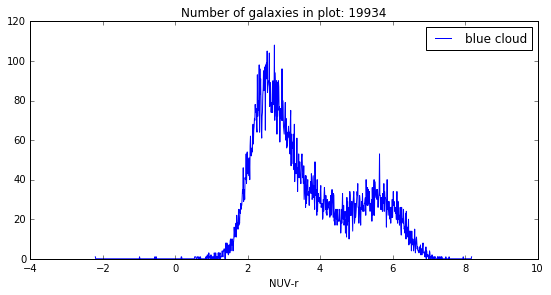

In [46]:
# histograms
plt.figure(figsize=(20,40))
colrow= [6,9]
y = [row[colrow[0]]-row[colrow[1]] for row in [row for row in galaxies if 0.08>row[3]>0.004 and 999>row[colrow[0]]-row[colrow[1]] > -999]]  
plt.subplot(8,2,i+1)
pt.plot_hist(y,200,'blue cloud',set_bin_size=True, bin_size=0.01,normed=False)
plt.title('Number of galaxies in plot: '+str(len(y)))
plt.legend()
label = names[colrow[0]-5]+'-'+names[colrow[1]-5]
plt.xlabel(label)

In [57]:
#plt.figure(figsize=(20,80))
colrow= [6,9]

x = [row[colrow[1]] for row in [row for row in galaxies if 0.08>row[3]>0.004 and 999>row[colrow[0]]-row[colrow[1]] > -999]]
y = [row[colrow[0]]-row[colrow[1]] for row in [row for row in galaxies if 0.08>row[3]>0.004 and 999>row[colrow[0]]-row[colrow[1]] > -999]]  
xx,yy,f = kernel_density_estimation(x,y)

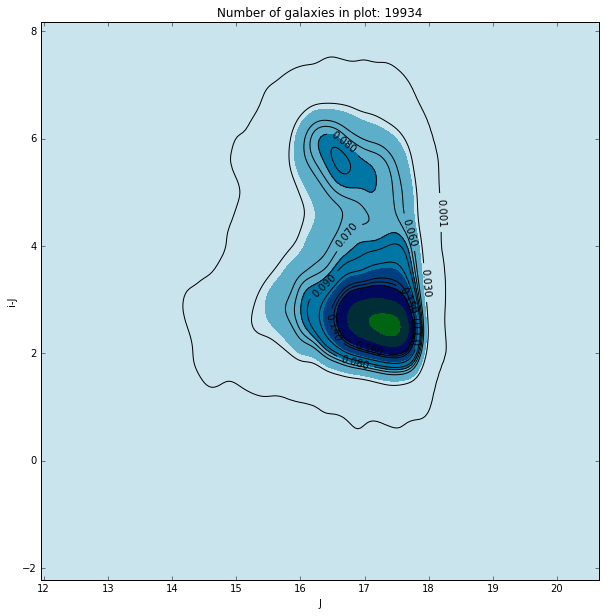

In [58]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
# Contourf plot
cfset = ax.contourf(xx, yy, f, cmap='ocean_r',)
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f,levels=[0.001,0.03,0.06,0.07,0.08,0.09,0.11,0.14,0.15,0.16], colors='k',alpha=1.)
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
label = names[colrow[0]-1]+'-'+names[colrow[1]-1]
ax.set_ylabel(label)
ax.set_xlabel(names[colrow[1]-1])
ax.set_title('Number of galaxies in plot: '+str(len(y)))
ax.set_xlim

In [54]:
for i in range(1,10):
    print(np.log10(i))

0.0
0.301029995664
0.47712125472
0.602059991328
0.698970004336
0.778151250384
0.845098040014
0.903089986992
0.954242509439
